In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import glob

from astropy import units as u
from astropy.coordinates import Angle

import utils as ut

/Users/brian/Documents/research/AlvordFieldTrip2021/code/Kestrel_analysis/utils.py:58: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


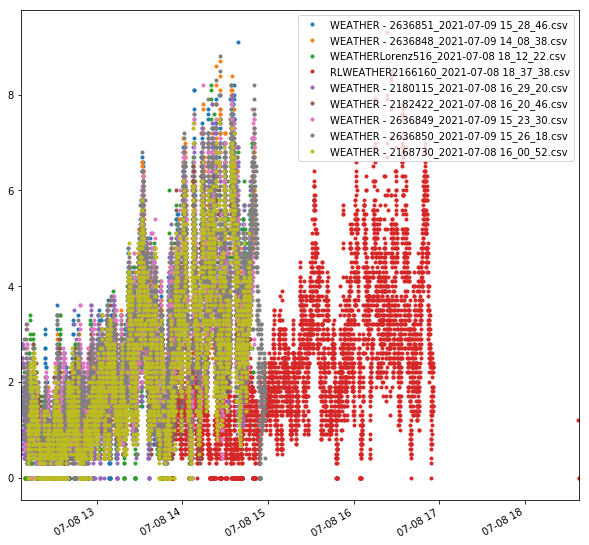

In [2]:
# plot all windspeed time-series
fig, ax = ut.plot_kestrel_timeseries('Wind_Speed')
fig.savefig("Windspeed_Timeseries.png", dpi=500, bbox_inches="tight")

/Users/brian/Documents/research/AlvordFieldTrip2021/code/Kestrel_analysis/utils.py:58: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


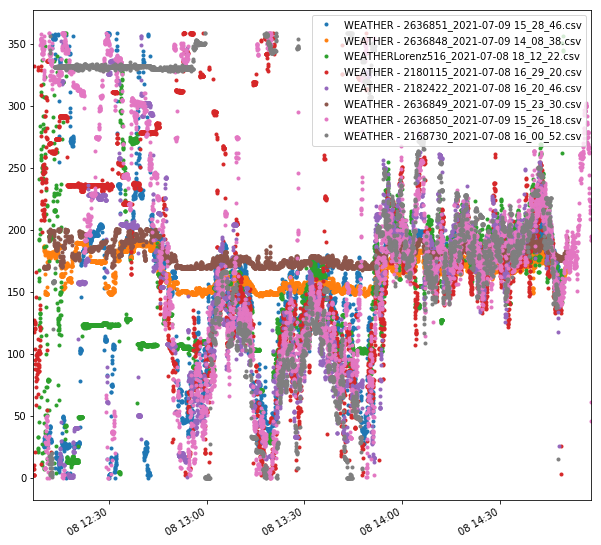

In [3]:
# plot all wind direction time-series
fig, ax = ut.plot_kestrel_timeseries('Mag_Dir')
fig.savefig("Winddirection_Timeseries.png", dpi=500, bbox_inches="tight")

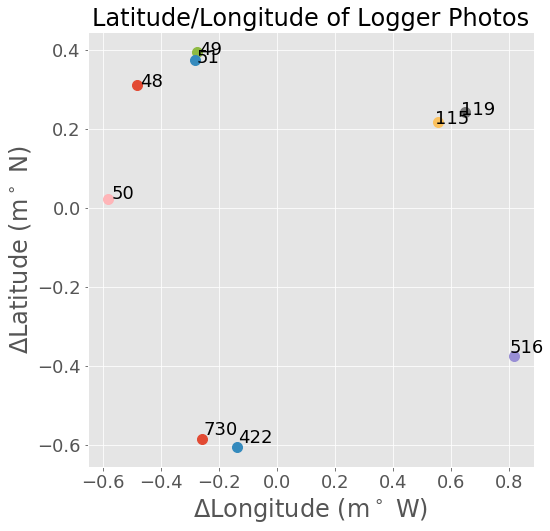

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

delta_latitudes = np.array([])
delta_longitudes = np.array([])

for logger in ut.logger_locations.keys():
    if(logger is not 'mean'):
        
        x = (ut.logger_locations[logger][1] - ut.logger_locations['mean'][1])
        y = (ut.logger_locations[logger][0] - ut.logger_locations['mean'][0])

        delta_latitudes = np.append(delta_latitudes, y)
        delta_longitudes = np.append(delta_longitudes, x)
        
        ax.plot(x*1000., y*1000., 
                marker='o', markersize=10, ls='')
        
        ax.text(x.value*1000.*0.98, y.value*1000.*0.98, logger, fontsize=18)
    
plt.title("Latitude/Longitude of Logger Photos", fontsize=24)

ax.grid(True)
ax.set_xlabel(r'$\Delta$Longitude (m$^\circ$ W)', fontsize=24)
ax.set_ylabel(r'$\Delta$Latitude (m$^\circ$ N)', fontsize=24)
ax.tick_params(labelsize=18)
fig.savefig("logger_locations.png", dpi=500, bbox_inches="tight")

In [4]:
# Experimenting with returning dataframe within time range
data = ut.read_kestrel_data(logger_name="49")
print(data.between_time('13:30', '13:40'))

/Users/brian/Documents/research/AlvordFieldTrip2021/code/Kestrel_analysis/utils.py:58: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


                     Temp  Wet_Bulb_Temp  Rel_Hum   Baro  Altitude Station_P  \
2021-07-08 13:30:00  30.4           13.5     14.0  877.4      1196  b'877.4'   
2021-07-08 13:30:02  30.3           13.5     14.1  877.4      1196  b'877.4'   
2021-07-08 13:30:04  30.3           13.5     14.1  877.4      1196  b'877.4'   
2021-07-08 13:30:06  30.2           13.4     14.1  877.2      1196  b'877.3'   
2021-07-08 13:30:08  30.3           13.5     14.1  877.4      1196  b'877.4'   
2021-07-08 13:30:10  30.3           13.5     14.1  877.4      1196  b'877.4'   
2021-07-08 13:30:12  30.5           13.6     14.2  877.4      1196  b'877.4'   
2021-07-08 13:30:14  30.8           13.8     14.2  877.2      1196  b'877.3'   
2021-07-08 13:30:16  31.0           13.9     14.3  877.2      1196  b'877.4'   
2021-07-08 13:30:18  31.1           14.0     14.3  877.4      1196  b'877.4'   
2021-07-08 13:30:20  31.0           13.9     14.3  877.4      1196  b'877.4'   
2021-07-08 13:30:22  30.9           13.9

In [2]:
# Make datasets for wind vector animation

start_time = '13:30'
end_time = '13:40'

# x coordinates for plot - longitudes
x = np.array([])
# y coordinates for plot - latitudes
y = np.array([])
# northward wind velocity component
V = np.array([])
# eastward wind velocity component
U = np.array([])

for logger_name in ut.logger_names:
    data = ut.read_kestrel_data(logger_name=logger_name)
    
    x = np.append(x, (ut.logger_locations[logger_name][1] - ut.logger_locations['mean'][1]).value)
    y = np.append(y, (ut.logger_locations[logger_name][0] - ut.logger_locations['mean'][0]).value)
    
    windspeed = data['Wind_Speed'].between_time(start_time, end_time)
    # convert from degrees to radians
    winddirection = data['True_Dir'].between_time(start_time, end_time)*np.pi/180.
  
    print(logger_name, windspeed.shape)
#     U = np.vstack((U, windspeed*np.cos(winddirection)))
#     V = np.vstack((V, windspeed*np.sin(winddirection)))
    
print(U.shape)

/Users/brian/Documents/research/AlvordFieldTrip2021/code/Kestrel_analysis/utils.py:58: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


730 (301,)
422 (301,)
516 (301,)
160 (0,)
115 (301,)
49 (301,)
50 (301,)
48 (301,)
51 (301,)
(0,)


NameError: name 'G' is not defined

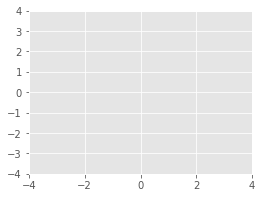

In [9]:
# Example animations using matplotlib's FuncAnimation
# Ken Hughes. 18 June 2016.

# For more detail, see
# https://brushingupscience.wordpress.com/2016/06/21/matplotlib-animations-the-easy-way/

# Examples include
#    - line plot
#    - pcolor plot
#    - scatter plot
#    - contour plot
#    - quiver plot
#    - plot with changing labels

from matplotlib.animation import FuncAnimation

# Use matplotlib ggplot stylesheet if available
try:
    plt.style.use('ggplot')
except:
    pass

# Set which type of animation will be plotted. One of:
# line, pcolor, scatter, contour, quiver, labels
animation_type = 'quiver'

# ----------------------------------------------------------------------------
# Create data to plot. F is 2D array. G is 3D array

# Create a two-dimensional array of data: F(x, t)
# x = delta_latitudes
# t = delta_longitudes
# X2, T2 = np.meshgrid(x, t)
# sinT2 = np.sin(2*np.pi*T2/T2.max())
# F = 0.9*sinT2*np.sinc(X2*(1 + sinT2))

# Set 
logger_names = ut.logger_locations.keys()
print(logger_names)

x = delta_longitudes
y = delta_latitudes

# ----------------------------------------------------------------------------
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(4, 3))

if animation_type == 'quiver':
#     ax.set(xlim=(-4, 4), ylim=(-4, 4))

    # Create U and V vectors to plot
    U = 
    V = 

    qax = ax.quiver(x, y, U[..., 0], V[..., 0], scale=100)

    def animate(i):
        qax.set_UVC(U[..., i], V[..., i])

# ----------------------------------------------------------------------------
# Save the animation
anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1, repeat=True)
# fig.show()
anim.save(animation_type + '.gif', writer='imagemagick')